#A Maldição da Dimensionalidade


O conteúdo da aula de hoje (inclusive figuras) foi extraído/baseado:
- no Capítulo 6 do Livro *Data Mining and Machine Learning: Fundamental Concepts and Algorithms* (https://dataminingbook.info/book_html/)
- Material da Web e Cabeça do professor...


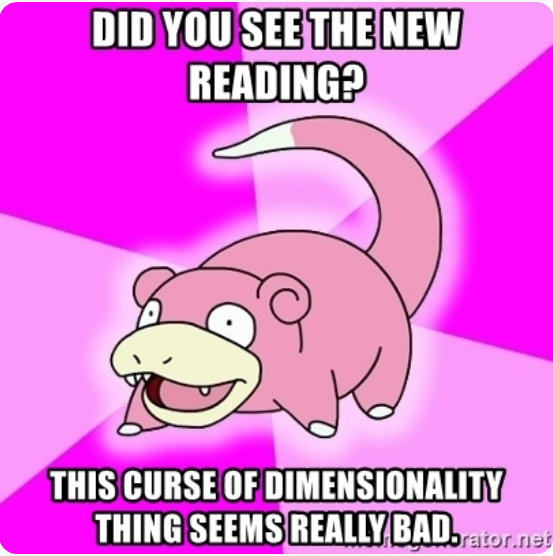

#O que já vimos?

- Introdução à manipulação de dados
- Introdução à visualização de dados
- Obtenção de dados na Web
- Manipulação de dados textuais
- Distâncias, métricas e comparação de objetos

# Introdução

Em muitas situações, o conjunto de dados de interesse pode ser visto como uma matriz com $n$ linhas e $d$ colunas.

As linhas representam objetos (e.g., pessoas) e as colunas os atributos (e.g., peso, altura, idade, etc.).

$$\mathbf{X} = \begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1d} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2d} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & x_{n3} & \dots  & x_{nd}
\end{bmatrix}
$$

## O que acontece quando $n$ e $d$ são muito grandes?

1. Há um problema relacionado ao armazenamento e à eficiência algorítmica.

2. **Maldição da dimensionalidade.**

# WHAT?

Simples, à medida que o número de dimensões ($d$) cresce, boa parte da intuição que temos sobre espaços de uma, duas ou três dimensões não é mais válida.

Em especial: **O valor da distância entre pontos "perde" o sentido**

Na aula de hoje, vamos ver alguns exemplos de manifestações matemáticas que suportam a afirmação acima.

# Aquecimento: um experimento simples

Vamos começar gerando $N$ pontos de maneira uniforme no espaço $[0, 1000000]^d$

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# @title
def generate(N, d):
  X = 1000000 * np.random.rand(N, d)
  return pd.DataFrame(X, columns = ['d' + str(i) for i in range(d)])

In [ ]:
X2 = generate(N = 1000, d = 2)
X2

In [ ]:
X3 = generate(N = 1000, d = 3)
X3

In [ ]:
X10 = generate(N = 1000, d = 10)
X100 = generate(N = 1000, d = 100)
X1000 = generate(N = 1000, d = 1000)

Agora, vamos computar a distância entre todos os pares de pontos. Para isso, podemos utilizar o método ``pdist`` da biblioteca ``scipy``.

In [ ]:
from scipy.spatial import distance

#dist = 'euclidean'
dist = 'cosine'

d2 =  distance.pdist(X2, dist)
d3 = distance.pdist(X3, dist)
d10 = distance.pdist(X10, dist)
d100 = distance.pdist(X100, dist)
d1000 = distance.pdist(X1000, dist)

Agora, vamos fazer um gráfico com a distribuição dos valores das distâncias. Para isso, vamos usar uma CDF empírica (lembram da CDF?)

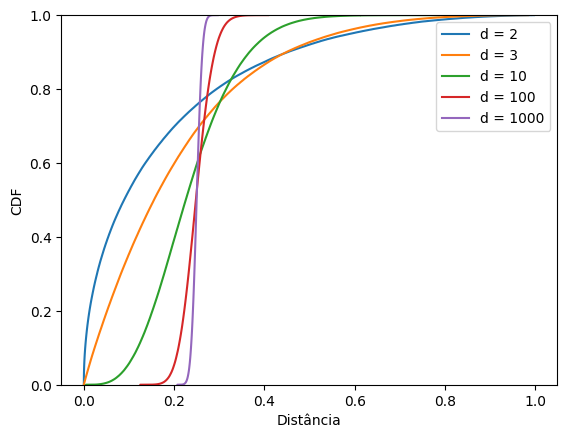

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liberar de maneira incremental
sns.ecdfplot(d2, label = 'd = 2')
sns.ecdfplot(d3, label = 'd = 3')
sns.ecdfplot(d10, label = 'd = 10')
sns.ecdfplot(d100, label = 'd = 100')
sns.ecdfplot(d1000, label = 'd = 1000')

plt.legend(loc = 'best')
plt.xlabel('Distância')
plt.ylabel('CDF');

## O que os resultados desses experimentos significam?

### Para a distância euclidiana


1. A distância entre os pontos tende a aumentar apenas devido ao aumento de $d$;
2. Encontrar pontos próximos (i.e., objetos similares) fica cada vez mais difícil.

### Para a distância do coseno

1. Para valores grandes e $d$, todos os pontos tendem a ficar a uma mesma distância uns dos outros (???)

# Aquecimento: um experimento simples (parte II)

Considere a figura abaixo.

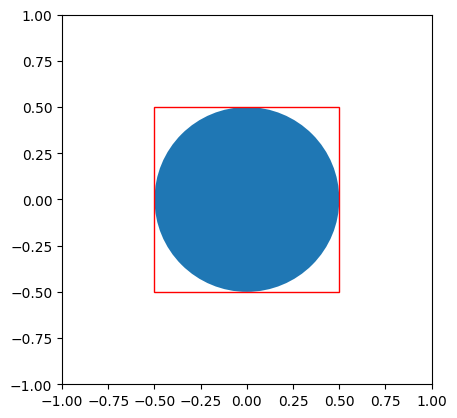

In [ ]:
# @title
from matplotlib.patches import Circle, Rectangle

def draw():
  center = (0.0, 0.0)
  radius = 0.5

  circle = Circle(center, radius)
  rect = Rectangle((-1/2,-1/2),1,1,linewidth=1,edgecolor='r',facecolor='none')

  fig, ax = plt.subplots()

  ax.add_patch(circle)
  ax.add_patch(rect)

  ax.set_aspect('equal')

  plt.xlim((-1, 1))
  plt.ylim((-1, 1))

draw()

Se gerarmos $N$ pontos dentro do **quadrado** aleatoriamente, quantos estarão dentro do **círculo**?

In [ ]:
N = 1000

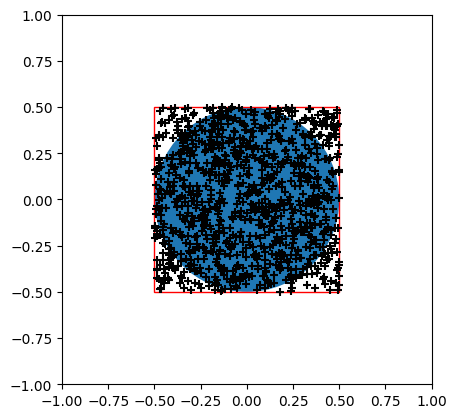

In [ ]:
# @title
import numpy as np

radius = 0.5

X = np.random.rand(N,2) - 0.5

draw()

plt.scatter(X[:, 0], X[:, 1], marker = '+', color = 'black');

In [ ]:
# @title
fr = ((X*X).sum(axis = 1) <= radius ** 2).sum() / N
print('Fração de pontos dentro do círculo: %f ' % fr)

Fração de pontos dentro do círculo: 0.793000 


**E se** fizéssemos a mesma coisa para uma esfera dentro de um cubo?

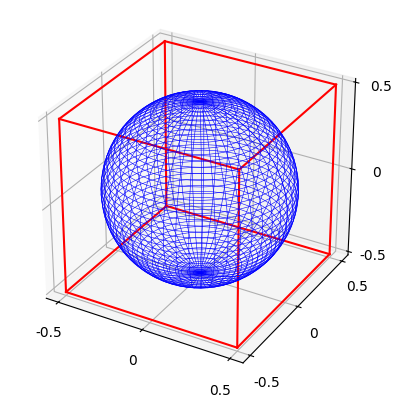

In [ ]:
#@title
# baseado em https://stackoverflow.com/questions/11140163/plotting-a-3d-cube-a-sphere-and-a-vector

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

def draw3D():
  fig = plt.figure()
  ax = fig.add_subplot(projection = '3d')
  ax.set_aspect("equal")

  # draw cube
  r = [-0.5, 0.5]
  for s, e in combinations(np.array(list(product(r, r, r))), 2):
      if np.sum(np.abs(s-e)) == r[1]-r[0]:
          ax.plot3D(*zip(s, e), color="r")

  # draw sphere
  u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
  x = 0.5 * np.cos(u)*np.sin(v)
  y = 0.5 * np.sin(u)*np.sin(v)
  z = 0.5 * np.cos(v)
  ax.plot_wireframe(x, y, z, color="b", linewidth = 0.4)

  ax.set_xticks([-0.5, 0, 0.5],[-0.5, 0, 0.5])
  ax.set_yticks([-0.5, 0, 0.5],[-0.5, 0, 0.5])
  ax.set_zticks([-0.5, 0, 0.5],[-0.5, 0, 0.5])

  ax.set_aspect('equal')
  # draw a point
  #ax.scatter([0], [0], [0], color="g", s=100)

  return ax

draw3D();

In [ ]:
N = 1000

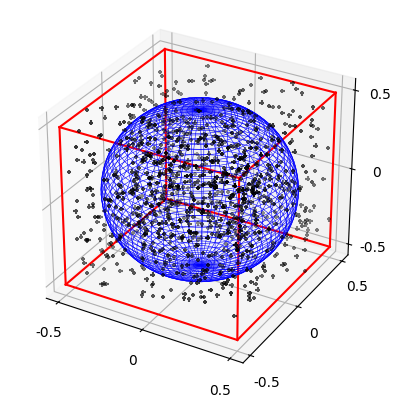

In [ ]:
# @title
X = np.random.rand(N,3) - 0.5

ax = draw3D()

ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker = '+', color = 'black', s = 10);

In [ ]:
# @title

fr = ((X*X).sum(axis = 1) <= radius ** 2).sum() / N
print('Fração de pontos dentro da esfera: %f ' % fr)

Fração de pontos dentro da esfera: 0.538000 


E se repetirmo o mesmo para uma dimensão $d > 3$?

In [ ]:
N = 1000
d = 5

In [ ]:
# @title

X = np.random.rand(N,d) - radius

fr = ((X*X).sum(axis = 1) <= radius ** 2).sum() / N
print('Fração de pontos dentro da hiperesfera: %f ' % fr)

Fração de pontos dentro da hiperesfera: 0.164000 


# Aquecimento: um experimento simples (parte III)

Considere a figura abaixo:
1. Um círculo tem raio 0.5;
2. Outro tem raio 0.5 - $ϵ$

In [ ]:
eps = 0.05

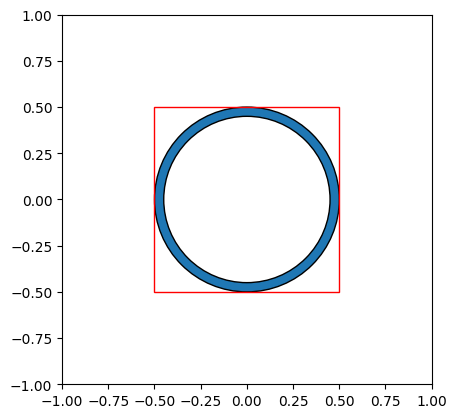

In [ ]:
# @title
from matplotlib.patches import Circle, Rectangle

def draw():
  center = (0.0, 0.0)
  radius = 0.5

  circle = Circle(center, radius, edgecolor = 'black')
  circle2 = Circle(center, radius - eps, facecolor = "white", edgecolor = 'black')
  rect = Rectangle((-1/2,-1/2),1,1,linewidth=1,edgecolor='r',facecolor='none')

  fig, ax = plt.subplots()

  ax.add_patch(circle)
  ax.add_patch(circle2)
  ax.add_patch(rect)

  ax.set_aspect('equal')

  plt.xlim((-1, 1))
  plt.ylim((-1, 1))

draw()

Se gerarmos muitos pontos dentro do círculo maior, qual a fração dos pontos estará na área azul?

In [ ]:
N = 1000

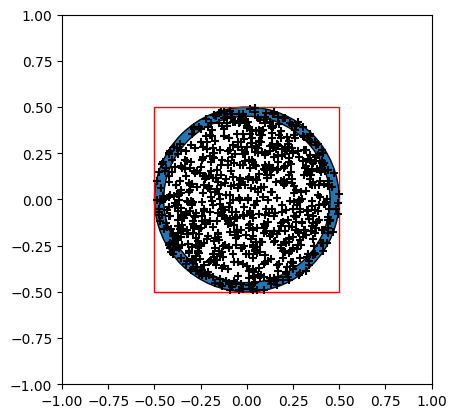

In [ ]:
# @title
import numpy as np

radius = 0.5

X = np.random.rand(N,2) - 0.5

draw()

Z = X[((X*X).sum(axis = 1) <= radius ** 2)]

plt.scatter(Z[:, 0], Z[:, 1], marker = '+', color = 'black');

In [ ]:
# @title
n1 = ((X*X).sum(axis = 1) <= radius ** 2).sum()
n2 = ((X*X).sum(axis = 1) <= (radius - eps) ** 2).sum()

fr = (n1 - n2) / n1

print('Fração de pontos dentro da área de interesse: %f ' % fr)

Fração de pontos dentro da área de interesse: 0.203727 


**E se** fizéssemos a mesma coisa para uma esfera dentro de um cubo?

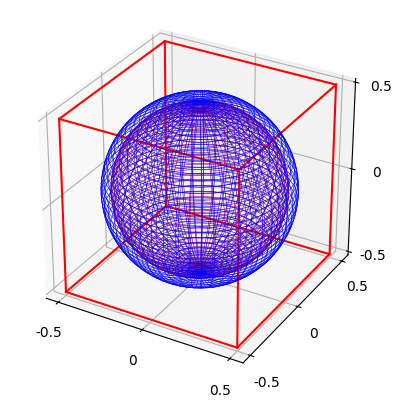

In [ ]:
#@title
# baseado em https://stackoverflow.com/questions/11140163/plotting-a-3d-cube-a-sphere-and-a-vector

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

def draw3D():
  fig = plt.figure()
  ax = fig.add_subplot(projection = '3d')
  ax.set_aspect("equal")

  # draw cube
  r = [-0.5, 0.5]
  for s, e in combinations(np.array(list(product(r, r, r))), 2):
      if np.sum(np.abs(s-e)) == r[1]-r[0]:
          ax.plot3D(*zip(s, e), color="r")

  # draw sphere
  u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
  x = 0.5 * np.cos(u)*np.sin(v)
  y = 0.5 * np.sin(u)*np.sin(v)
  z = 0.5 * np.cos(v)
  ax.plot_wireframe(x, y, z, color="b", linewidth = 0.4)

  # draw sphere
  u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
  x = (0.5 - eps) * np.cos(u)*np.sin(v)
  y = (0.5 - eps) * np.sin(u)*np.sin(v)
  z = (0.5 - eps) * np.cos(v)
  ax.plot_wireframe(x, y, z, color="purple", linewidth = 0.4)

  ax.set_xticks([-0.5, 0, 0.5],[-0.5, 0, 0.5])
  ax.set_yticks([-0.5, 0, 0.5],[-0.5, 0, 0.5])
  ax.set_zticks([-0.5, 0, 0.5],[-0.5, 0, 0.5])

  ax.set_aspect('equal')
  # draw a point
  #ax.scatter([0], [0], [0], color="g", s=100)

  return ax

draw3D();

In [ ]:
N = 10000

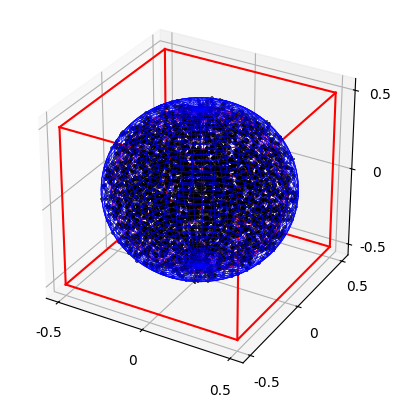

In [ ]:
# @title
X = np.random.rand(N,3) - 0.5

ax = draw3D()

Z = X[(X*X).sum(axis = 1) <= radius ** 2]

ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], marker = '+', color = 'black', s = 10);

In [ ]:
# @title

n1 = ((X*X).sum(axis = 1) <= radius ** 2).sum()
n2 = ((X*X).sum(axis = 1) <= (radius - eps) ** 2).sum()

fr = (n1 - n2) / n1

print('Fração de pontos dentro do espaço de interesse: %f ' % fr)

Fração de pontos dentro do espaço de interesse: 0.271271 


E se repetirmo o mesmo para uma dimensão $d > 3$?

In [ ]:
import numpy as np
N = 1000000
d = 10
eps = 0.05

In [ ]:
# @title

X = np.random.rand(N,d) - radius

n1 = ((X*X).sum(axis = 1) <= radius ** 2).sum()
n2 = ((X*X).sum(axis = 1) <= (radius - eps) ** 2).sum()

fr = (n1 - n2) / n1

print('Fração de pontos dentro do hiperespaço de interesse: %f ' % fr)

Fração de pontos dentro do hiperespaço de interesse: 0.661066 


# Preliminares

## O Volume do hipercubo

### Perguntas

1. Em duas dimensões: qual a **área** de um **quadrado** de lado $l$?
2. Em três dimensões: qual o **volume** de um **cubo** de lado $l$?
3. Em $d$ dimensões: qual a **hipervolume** de um **hipercubo** de lado $l$?

### Respostas

1. $l^2$
2. $l^3$
3. $l^d$

## O Volume da hiperesfera

### Perguntas

1. Qual a **área** do **círculo** de raio $r$?
2. Qual o **volume** da **esfera** de raio $r$?
3. Qual o **hipervolume** da **hiperesfera** de raio $r$ e dimensão $d$?

### Respostas

1. $\pi r^2$
2. $\frac{4}{3}\pi r^3$
3. ${{\frac {\pi ^{\frac {d}{2}}}{\Gamma \left({\frac {d}{2}}+1\right)}}r^{d}}$

#### O que é a função $\Gamma(x)$?

Dado $x > 0$
$$\Gamma(x) = \int_0^\infty t^{x-1}e^{-t}dt.$$

Algumas propriedades da função $\Gamma$:
- $\Gamma(1) = 1$
- $\Gamma\left(\frac{1}{2}\right) = \sqrt{\pi}$
- Para $n \ge 1$ e inteiro, $\Gamma(n) = (n-1)!$

# O Volume da hiperesfera de raio 1

O gráfico abaixo mostra o volume da hiperesfera quando $d$ cresce.

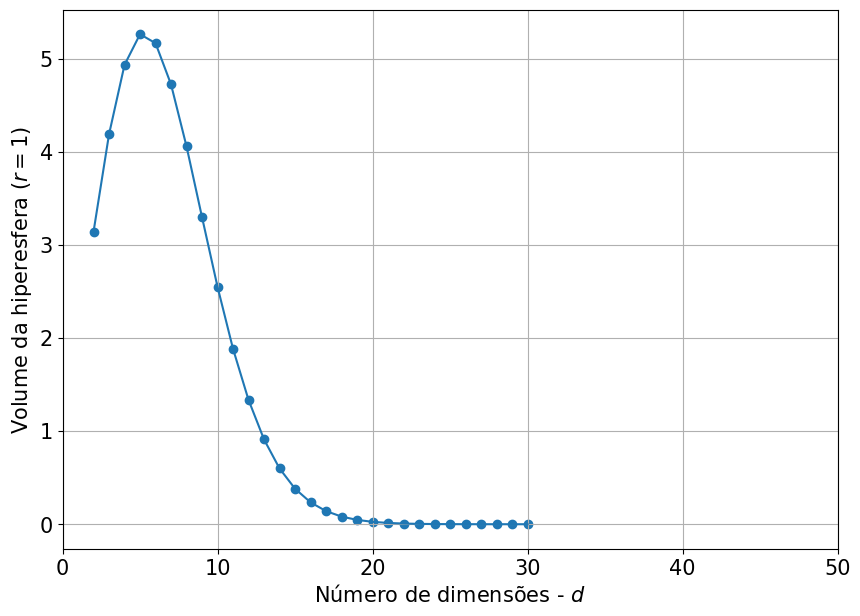

In [ ]:
import scipy.special as sp
import math
import numpy as np
from matplotlib import pyplot as plt

def vol(d, r):
    return ((math.pi ** (d / 2.0)) * (r ** d)) / (sp.gamma(d / 2.0 + 1))

x = np.arange(2, 30+1)
#x = np.arange(2, 10+1)

y = vol(x, 1)

fig = plt.figure(figsize=(10,7))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(x, y)
plt.grid(True)
plt.scatter(x, y)
plt.xlim((0, 50))
plt.xlabel(r"Número de dimensões - $d$", fontsize = 15)
_ = plt.ylabel(r"Volume da hiperesfera ($r = 1$)", fontsize=15)

## Conclusão

À medida que $d$ cresce, o hipervolume da hiperesfera de raio 1 tende a zero!

# A hiperesfera dentro do hipercubo


Vamos continuar a análise do exemplo anterior. Sabemos que:
1. O hipervolume da hiperesfera de raio $r$ e $d$ dimensões é ${{\frac {\pi ^{\frac {d}{2}}}{\Gamma \left({\frac {d}{2}}+1\right)}}r^{d}}$
2. O hipervolume do hipercubo de lado $l = 2r$ é $(2r)^d$

## Qual a fração do espaço do hipercubo ocupada pela hiperesfera?

As figuras abaixo ilustram a ocupação do espaço do hipercubo para duas e três dimensões.

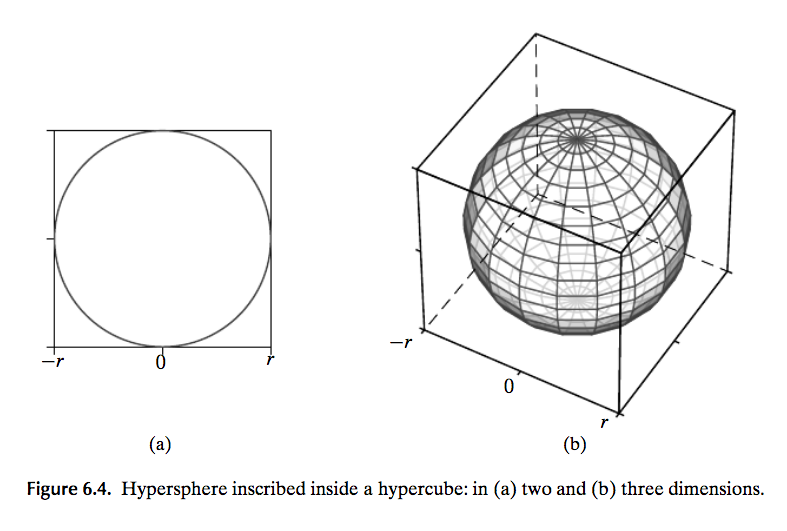

Do ponto de vista teórico, estamos interessados no que ocorre quando com razão entre os dois hipervolumes quando $d\rightarrow \infty$. Temos,

$$\lim_{d\rightarrow \infty}\frac{{{\frac {\pi ^{\frac {d}{2}}}{\Gamma \left({\frac {d}{2}}+1\right)}}r^{d}}}{(2r)^d} = \lim_{d\rightarrow \infty} \frac{\pi^{\frac{d}{2}}}{2^d\Gamma\left(\frac{d}{2}+1\right)} = 0
$$

Em outras palavras, o volume do hipercubo domina o hipervolume da hiperesfera. Há alguma explicação/intuição? Veja a figura abaixo.

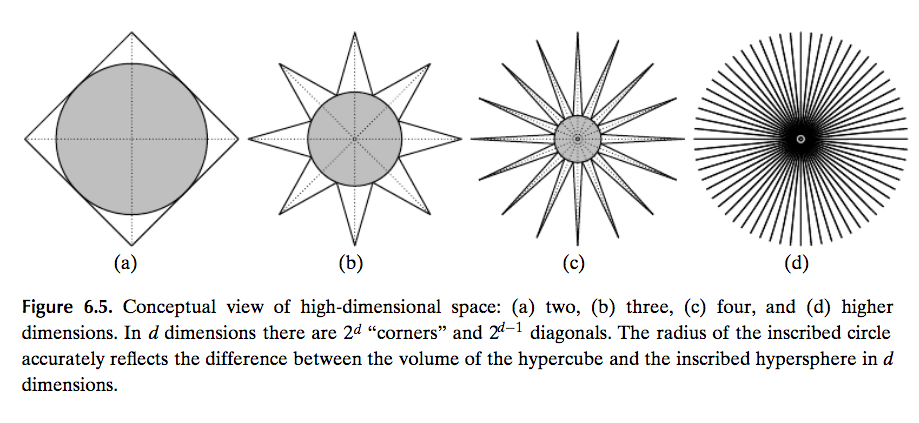

# O Volume da casca da hiperesfera

Considere a figura abaixo.

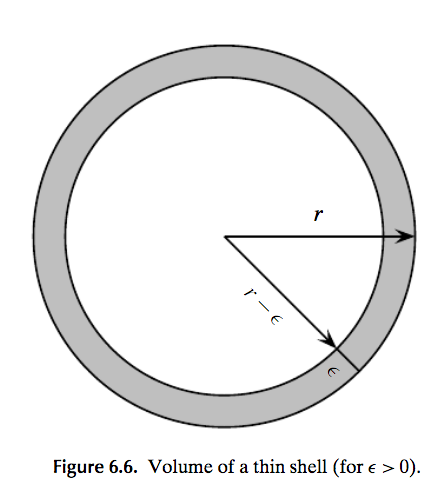

Qual a fração da área do círculo ocupada pela casca de espessura $ϵ$ (área em cinza na figura)? Vamos considerar o caso geral de $d$ dimensões e raio $r$.

$$\frac{\frac{\pi^{\frac{d}{2}}}{\Gamma\left(\frac{d}{2}+1\right)}r^{d} - \frac{\pi^{\frac{d}{2}}}{\Gamma\left(\frac{d}{2}+1\right)}(r-ϵ)^{d}}{\frac{\pi^{\frac{d}{2}}}{\Gamma\left(\frac{d}{2}+1\right)}r^{d}} = \cdots = 1 - \left(1 - \frac{ϵ}{r}\right)^d$$

Assumindo que $ϵ$ é um valor pequeno e $\frac{ϵ}{r} < 1$, temos que a quantidade acima tende a 1 quando $d\rightarrow \infty$.

## Conclusão

Em outras palavras, não importa o quão fina é a casca da hiperesfera, quando $d$ é suficientemente grande, todo o volume da hiperesfera fica concentrado na casca.

# As diagonais no hiperespaço

## Exemplo no $\mathbb{R}^2$

Considere os vetores $\mathbf{e}_1 = (1, 0)^T$ e o vetor $\mathbf{1} = (1, 1)^T$. Ambos estão ilustrados na figura abaixo.

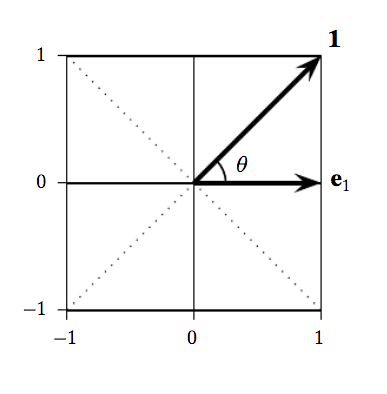

### Pergunta

- Qual é o ângulo $\theta$?

### Resposta

* $\theta = \frac{\pi}{4}$

## Exemplo no $\mathbb{R}^3$

Considere os vetores $\mathbf{e}_1 = (1, 0, 0)^T$ e o vetor $\mathbf{1} = (1, 1, 1)^T$. Ambos estão ilustrados na figura abaixo.

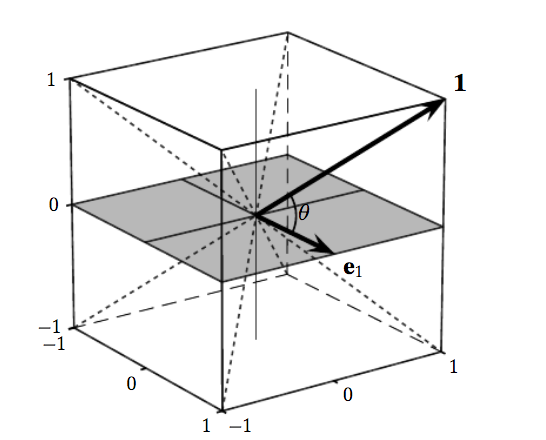

### Pergunta

- Qual é o ângulo $\theta$?

### Resposta

* $\theta \approx 0.955316 > \frac{\pi}{4} \approx 0.785398$

## E no caso de $d$ dimensões?

Considere os vetores $\mathbf{e}_1 = (1, 0, \dots, 0)^T$ e o vetor $\mathbf{1} = (1, 1, \dots, 1)^T$.

Vamos calcular o cosseno do ângulo, $\theta$, entre os dois vetores. Temos,

$$\cos\theta = \frac{\mathbf{e}_1\cdot \mathbf{1}}{\Vert \mathbf{e}_1\Vert \Vert \mathbf{1} \Vert} = \frac{(1, 0, \dots, 0)^T \cdot (1, 1, \dots, 1)^T}{\Vert (1, 0, \dots, 0)^T \Vert \Vert (1, 1, \dots, 1)^T \Vert} = \frac{1}{\sqrt{d}}.$$

### Pergunta

Qual é o ângulo $\theta$ quando $d\rightarrow \infty$?

### Resposta

Veja que

$\lim_{d\rightarrow \infty} \cos\theta = 0.$

Isso implica que

Quando $d\rightarrow \infty$, $\theta \rightarrow \frac{\pi}{2}$.

## Conclusão

Em espaços de alta dimensão, as diagonais são "ortogonais" aos vetores canônicos. Isso parece loucura!!!

# Implicações em Aprendizado de Máquina

Os resultados acima mostram que não devemos usar algoritmos baseados em distância quando temos dados de alta dimensionalidade?

**Não** necessariamente! Mas, esses resultados são uma boa indicação que alguma técnica de "redução de dimensionalidade" ou "seleção de características" deve ser aplicada.

Algumas implicações da maldição da dimensionalidade são discutidas na página da Wikipédia (https://en.wikipedia.org/wiki/Curse_of_dimensionality). Essas implicações fogem ao escopo do nosso curso **nesse momento**.

# What is next?

Nas próximas aulas falaremos de técnicas de redução de dimensionalidade!